#### Hello (noteboek geinspireert door Kaggle aangepast door Ferry !!)
Dit notebook en een vliegende start in data-analyse en machinelearning.

1)Feature Selection

2)Model selection

3)Input validation

4)Voorspellen

5)Gradio webinterface naar diagnostic tool


## Vraag 1

Beantwoorden in de volgende cel:

- Wat is diabetes?
    - Diabetes is een suikerziekte. Waarbij er twee types bestaan. 
- Hoe krijg je het?
    - Je kan diabetes door verschillende manieren krijgen. Sommige mensen hebben een erfelijke aanleg, waardoor ze het eenmaal snel krijgen. Voor andere kan het komen, doordat ze slechte voeding nemen, overgewicht hebben of te weinig sporten. 
    - Volgens de heathmap hieronder kan het ook voorkomen na/tijdens een zwangerschap, veel glucose in het bloed, hoog BMI en ouderdom.  
- Zijn er verschillende soorten?
    - Ja er zijn twee types. Hierbij heb je ook een verschil in oorzaak van diabetes krijgen. Bijvoorbeeld:
        - Type 1: kan je krijgen door virussen.
        - Type 2: kan je krijgen door te roken en te weinig bewegen. 
- Wat zijn de gevolgen?
    De symptomen van diabetes zijn:
    - Veel plassen 
    - Droge mond
    - Veel drinken
    - Wazig zien 
    - Vermagering 
    - Moeheid
- Hoe wordt het gediagnostiseerd?
    - Doormiddel van een bloedonderzoek, kan je diabetes vaststellen. Er wordt gekeken naar hoe hoog het suikergehalte is in het bloed. 
- Hoe wordt het behandeld?
    Er zijn verschillende behandelingen. 
    - Ten eerste moeten de patient een gezondere levensstijl nemen. Bijvoorbeeld:
        - Stoppen met roken
        - Meer bewegen
        - Goed eten
    - De patient kan ook insuline inspuiten 

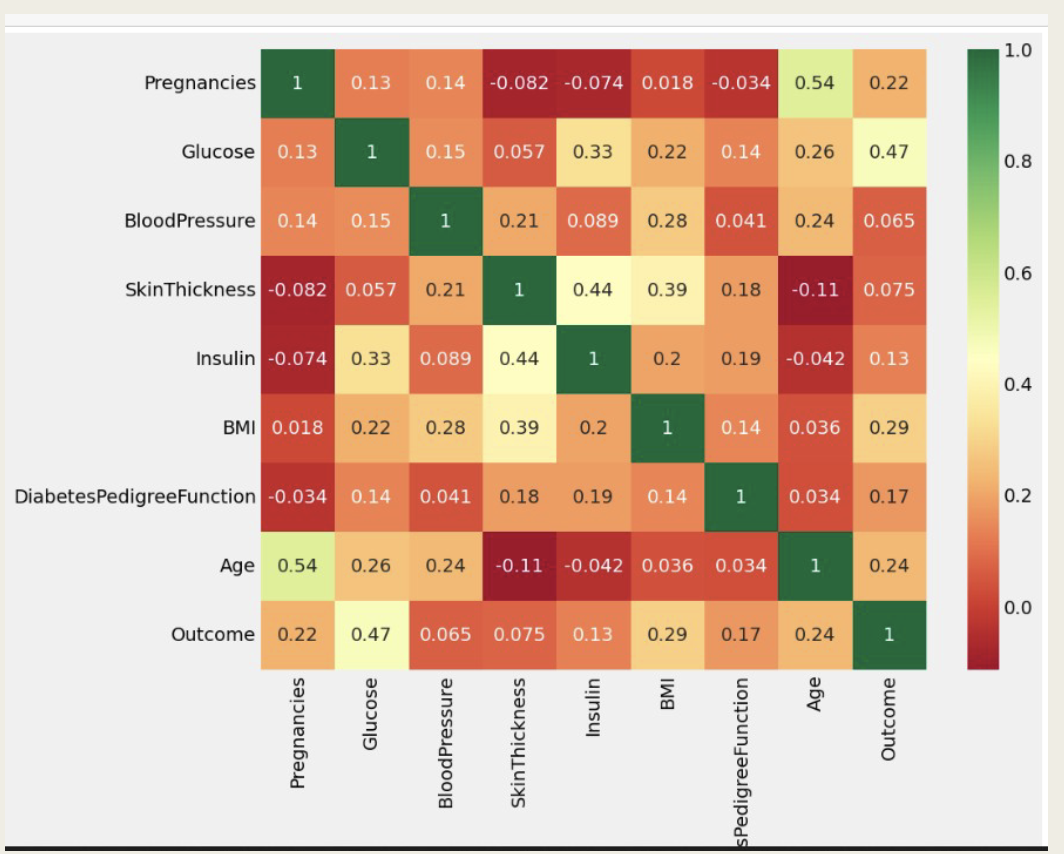


In [2321]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')


In [2322]:
data= pd.read_csv('../../../data/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2323]:
# test 1 (b.v nul waarden)
df1 = {'Pregnancies': data['Pregnancies'].value_counts()[0].sum(), 'Glucose': data['Glucose'].value_counts()[0].sum(), 'BloodPressure': data['BloodPressure'].value_counts()[0].sum(),'SkinThickness': data['SkinThickness'].value_counts()[0].sum(),  'Insulin': data['Insulin'].value_counts()[0].sum(),  'BMI': data['BMI'].value_counts()[0].sum(), 'Outcome': data['Outcome'].value_counts()[0].sum()}
print(df1)

{'Pregnancies': 111, 'Glucose': 5, 'BloodPressure': 35, 'SkinThickness': 227, 'Insulin': 374, 'BMI': 11, 'Outcome': 500}


In [2324]:
# test 2 (b.v nan waarden)
df = data.isna().sum()
print(df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [2325]:
# test 3 (Wat kan je nog meer testen)

# Het testen van hoeveel vrouwen prediabetes hebben. Prediabetes is een glucose gehalte tussen 140 en 199 mg/dl
column = data['Glucose']
column[column > 140].count()


192

# test 3 (Wat kan je nog meer testen)

#Het testen van hoeveel vrouwen prediabetes hebben. Prediabetes is een glucose gehalte tussen 140 en 199
column = data['Glucose']
column[column > 140].count()



In [2326]:

diabetes = data['Outcome'].value_counts()[1].sum()
no_diabetes = 768


aantal_diabetes_patienten = diabetes / no_diabetes * 100

aantal_diabetes_patienten, diabetes, no_diabetes

# 1 op de 3 patienten heeft diabetes. Ik denk dat dit verschil niet perse een groot probleem is. Het zijn wel veel mensen. 


(34.89583333333333, 268, 768)

## (268, 500)
Dit verschil is geen probleem. 

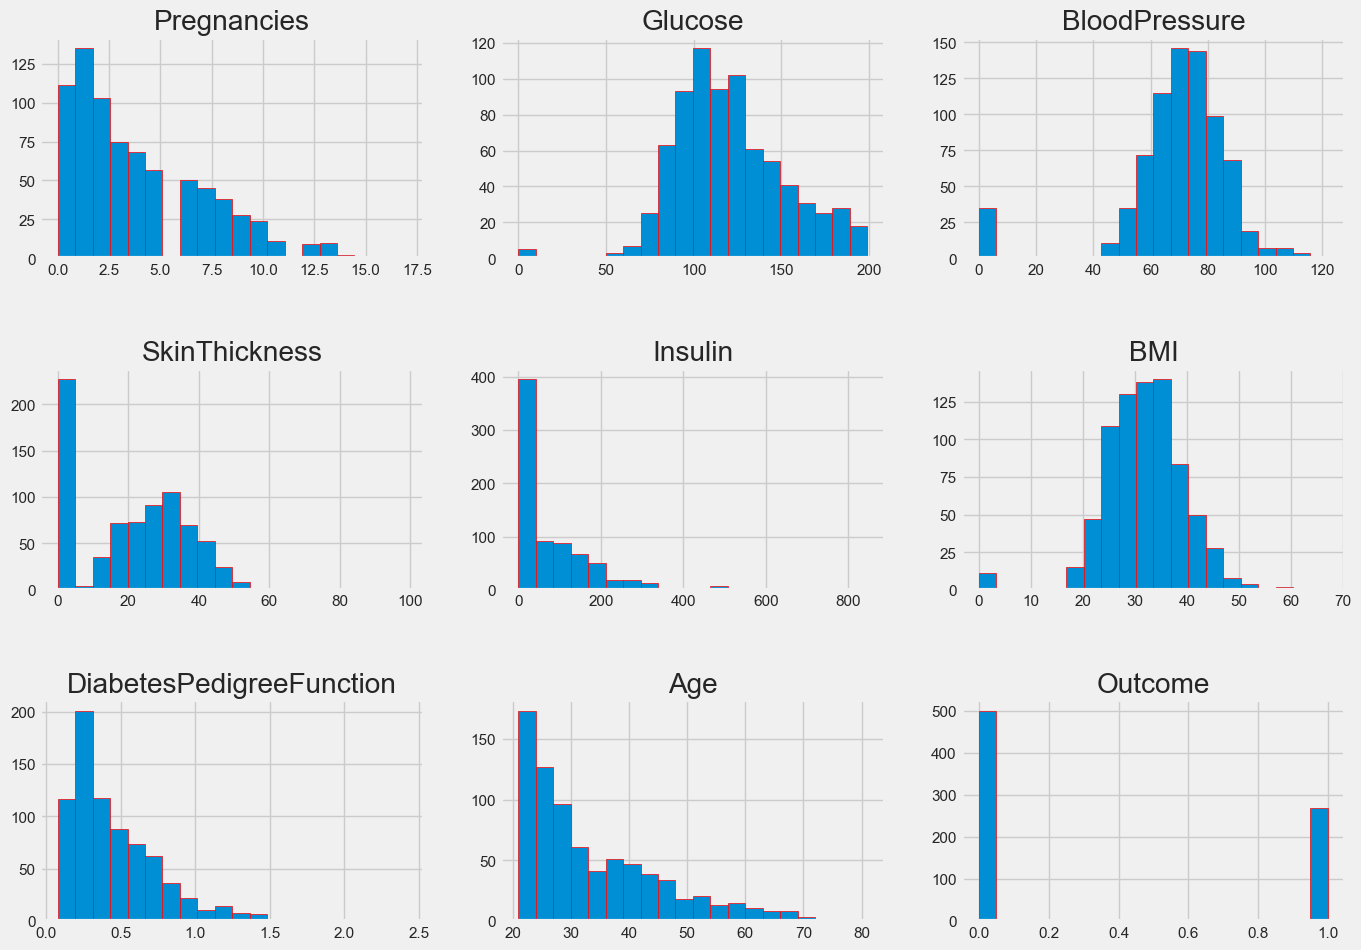

In [2327]:
columns=data.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='red')
    plt.title(i)
plt.show()

Dat bij pregnancies na 5 kinderen een gat zit tot 6 of 7.
Er valt op dat de vrouwen niet oud worden. Ze krijgen wel veel kinderen en de glucose halte is erg hoog bij veel vrouwen. 

Het valt op dat de Glucose, BloodPressure en BMI tabellen normaal verdelingen zijn, waarbij BloodPressure een grote uitschieter heeft bij het begin van de tabel.

## Opdracht  5:

Doe de zelfde test maar selecteer nu alleen op de gevallen met diabetes. Is er een verschill met de plots waarin alle gevallen staan. Geef een motivatie?

- Ja er is een verschil. Het meesten verschil is te zien in deze tabellen: Age, pregnancy, Glucose en bloodpressure.

Bevatten sommige kolommen ongeldige waarden?

- Nee

Repareer de tabel zo dat er geen nul waarden instaan?

Welke waarde zou je kiezen als vervanging van de nul waarden?
- Je kunt de mediaan gebruiken


TIP: Maak eerst een tabel met alleen de diabetes gevallen en gebruik de onderstaande cellen.

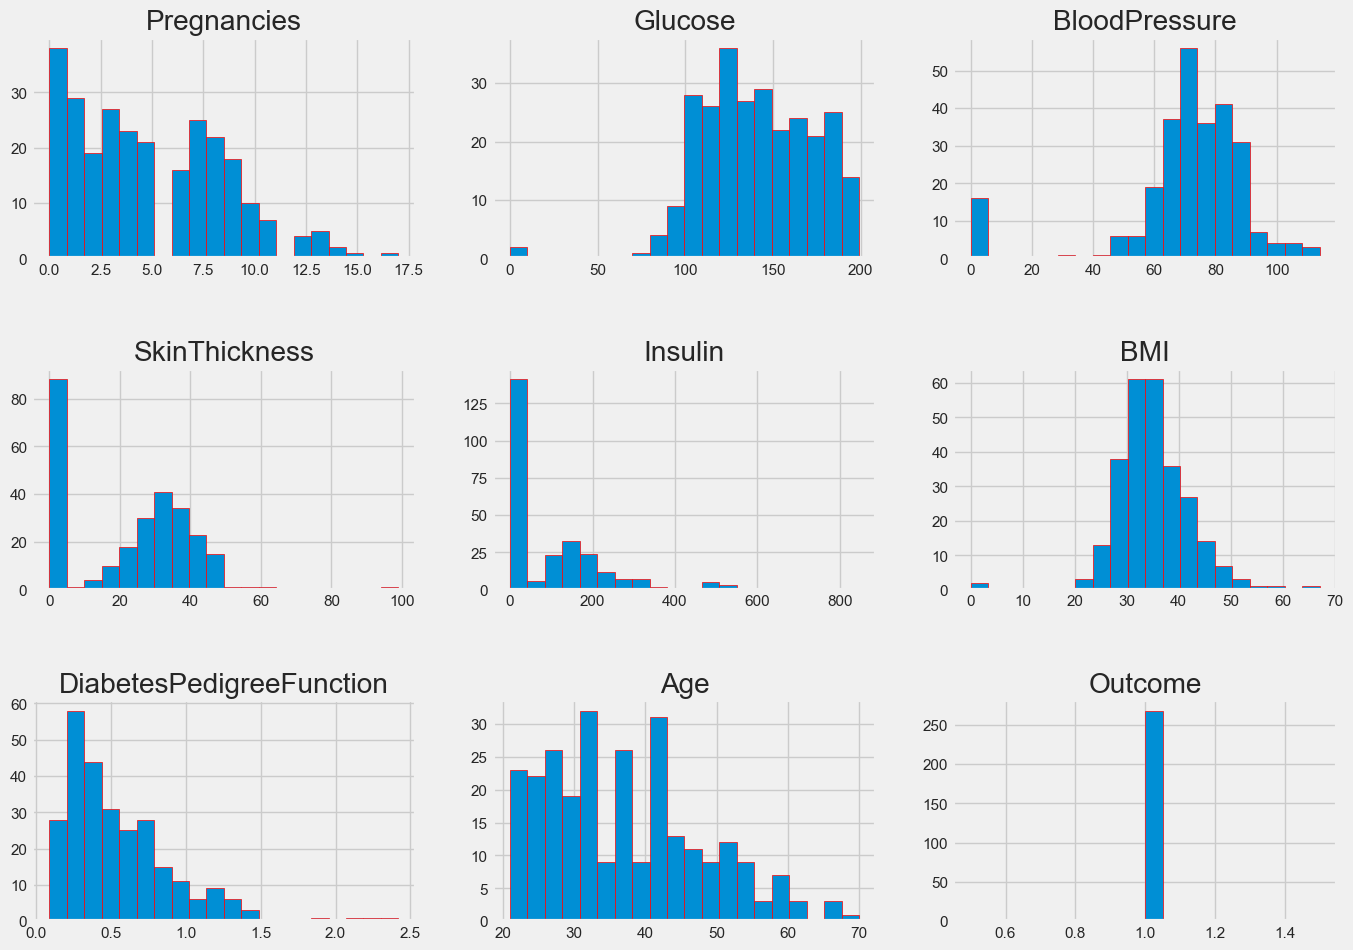

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [2328]:


df2 = data.loc[data['Outcome'] == 1]

columns=df2.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df2[i].hist(bins=20,edgecolor='red')
    plt.title(i)
plt.show()

df2


## Vraag ? : Wat valt op:

- Glucose van meesten patienten is erg hoog.
- De leeftijd tabel is erg veranderd. Er komen nu meer 30 plussers voor.
- Wat mij ook opvalt is dat veel patienten nooit zwanger zijn geweest en ondanks dat nog steeds diabetes hebben.


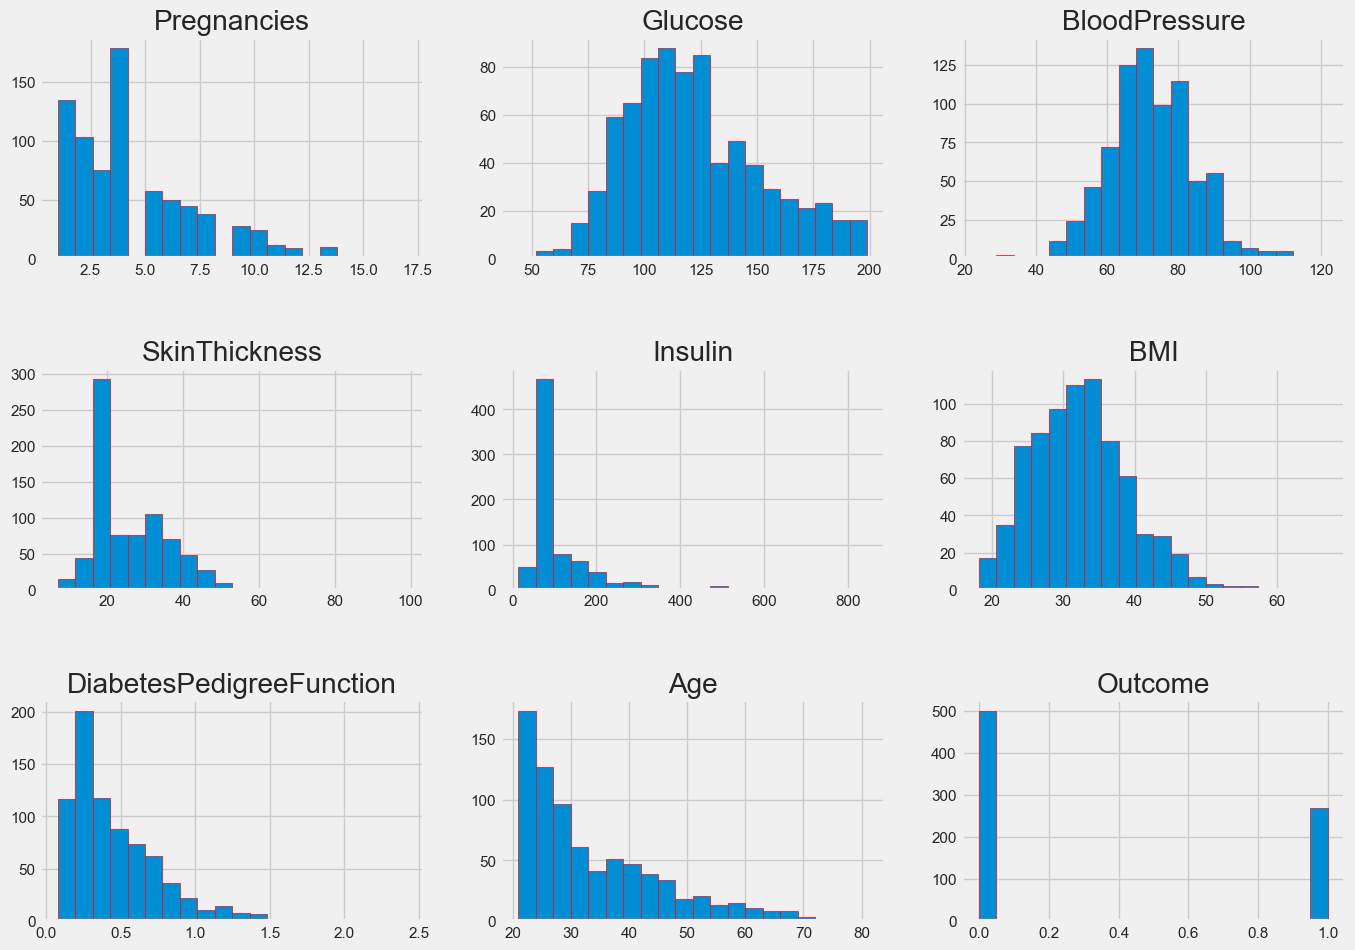

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [2329]:
# vervang 0 and NaN waarden.
# test 1 (b.v nul waarden)


#ik vervang nu de 0 bij bv 0 pregnancy's, maar moet ik ook de null waarde veranderen bij 0 patienten met 4 babies?
for column in data:
    if data[column].name != "Outcome":
        data[data[column].name]=data[data[column].name].replace(0,data[data[column].name].mean())


columns=data.columns[:9]
plt.subplots(figsize=(15,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(int(length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    data[i].hist(bins=20,edgecolor='red')
    plt.title(i)
plt.show()

data


In [2330]:
#Hoe bepaal je in pandas de correlatie tussen twee of meerdere kolomen
print(data.corr())

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.152568       0.253275       0.045776   
Glucose                      0.152568  1.000000       0.219666       0.160766   
BloodPressure                0.253275  0.219666       1.000000       0.134155   
SkinThickness                0.045776  0.160766       0.134155       1.000000   
Insulin                     -0.016738  0.396597       0.010926       0.240361   
BMI                          0.097663  0.231478       0.281231       0.535703   
DiabetesPedigreeFunction    -0.010297  0.137106       0.000371       0.154961   
Age                          0.525261  0.266600       0.326740       0.026423   
Outcome                      0.247971  0.492908       0.162986       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.016738  0.097663                 -0.010297   
Glucose                   0.396597  0.231

In [2331]:
#correlatie tussen Pregnancies en Glucose
print(data['Pregnancies'].corr(data['Glucose']))

### Deelvraag: Wat is een correlatie tussen twee attributen?

0.15256814308770578


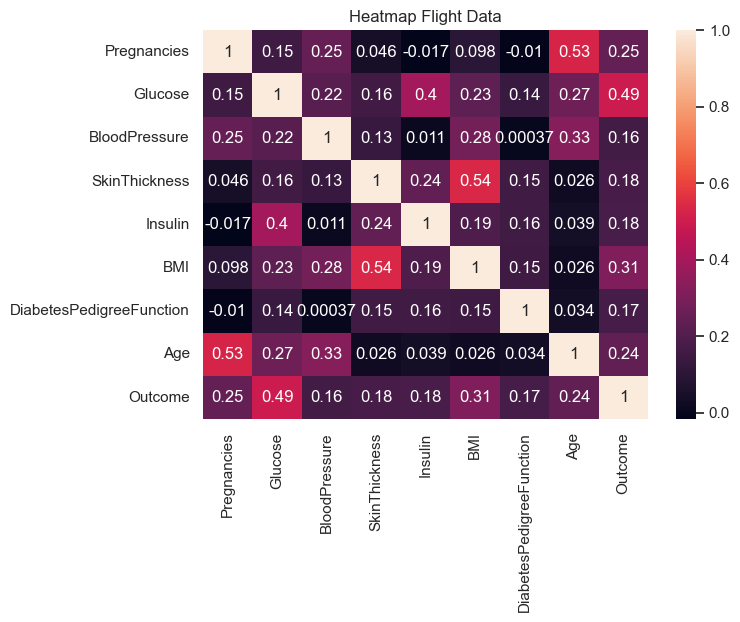

In [2332]:
# Heatmap
sns.set()
ax = sns.heatmap(data.corr(), annot=True)
plt.title("Heatmap Flight Data")
plt.show()







In [2333]:
# Importeen aantal standaard systeem voor machine-learning gebruik pip om de ontbrekende modules te installeren.

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2334]:
# De code hieronder is absuluut noodzakelijk voor een ML training.
# Er staat wel een regel teveel!, wat kan weg?

#de outcome

diab = data

#outcome=diab['Outcome']

data=diab[diab.columns[:8]]
train,test=train_test_split(diab,test_size=0.25,random_state=0,stratify=diab['Outcome'])# stratify the outcome
train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [2335]:
train_X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
432,1.0,80.0,74.000000,11.000000,60.000000,30.000000,0.527,22
453,2.0,119.0,69.105469,20.536458,79.799479,19.600000,0.832,72
706,10.0,115.0,69.105469,20.536458,79.799479,31.992578,0.261,30
606,1.0,181.0,78.000000,42.000000,293.000000,40.000000,1.258,22
118,4.0,97.0,60.000000,23.000000,79.799479,28.200000,0.443,22


In [2336]:
train_Y.head(5)

432    0
453    0
706    1
606    1
118    0
Name: Outcome, dtype: int64

## Opdracht 9:

Wat zie je in de output van de bovenstaande cellen? (2 stuks)


Antwoord:
train_X = toont eerste 5 rijen die de voorspellings variabelen zijn van het trainingsset ML model.
train_Y = toont het doel variabel van het ML model trainingsset.






## SVM (Zoek uit wat een SVM model is?)

Wikipedia: Support vector machine is een algoritme op het gebied van gecontroleerd machinaal leren.

Met het Support Vector Machine (SVM) algoritme doet een data scientist voorspellingen door data in groepen te verdelen.
Je kunt SVM gebruiken om zowel numerieke waarden te voorspellen (regressie) als om een groep of label te bepalen (classificatie). In de praktijk wordt het het meest gebruikt bij classificatie-vraagstukken.











In [2337]:
types=['rbf','linear']
for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,test_Y))

Accuracy for SVM kernel= rbf is 0.75
Accuracy for SVM kernel= linear is 0.7864583333333334


## Logistic Regression (Wat is een Logistic Regression model?)

Wikipedia: In de statistiek wordt logistische regressie gebruikt om een dichotome uitkomstvariabele te relateren aan een of meer variabelen.

Logistische regressie schat de waarschijnlijkheid dat een gebeurtenis plaatsvindt, zoals stemmen of niet stemmen, op basis van een gegeven
 dataset van onafhankelijke variabelen. Aangezien de uitkomst een waarschijnlijkheid is,
 wordt de afhankelijke variabele begrensd tussen 0 en 1. Bij logistische regressie wordt een logittransformatie toegepast op de odds,
 dat wil zeggen de kans op succes gedeeld door de kans op mislukking. Dit is ook algemeen bekend als de log odds, of de natuurlijke
 logaritme van odds.










In [2338]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the Logistic Regression is 0.765625


In [2339]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy of the DecisionTreeClassifier is',metrics.accuracy_score(prediction,test_Y))

The accuracy of the DecisionTreeClassifier is 0.7083333333333334


### Alle systemen op een rijtje.


In [2340]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.786458
Radial Svm,0.750000
Logistic Regression,0.765625
KNN,0.750000
Decision Tree,0.708333


De bovenstaande algoritmen geven geen erg hoge nauwkeurigheid. Dit kan worden verbeterd door attributeselectie te gebruiken en alleen relevante kolommen te gebruiken. We kunnen ook gebruik maken van ensembling of middeling van verschillende algoritmen. 

In [2341]:
### Vraag ?
#Wat is ensembling?

#Het gebruiken van meerdere models en deze samenvoegen om tot een oplossing te komen. 


Object `ensembling` not found.


In [2342]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    abc.append(metrics.accuracy_score(prediction,test_Y))
models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe




,Accuracy
Linear Svm,0.786458
Radial Svm,0.750000
Logistic Regression,0.765625
KNN,0.750000
Decision Tree,0.713542


In [2343]:
model = svm.SVC(kernel='linear')
cm_display =  metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels=[False, True])

test_Y.describe()

count    192.000000
mean       0.348958
std        0.477887
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

ConfusionMatrix: 
[[110  15]
 [ 26  41]]
0.7864583333333334


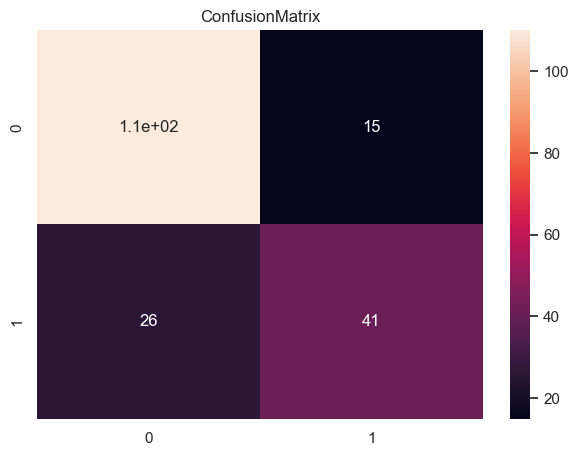

In [2344]:
#  Confusion matrix.
from sklearn import metrics

types = ["rbf", "linear"]

for i in types:
    model=svm.SVC(kernel=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)

cm = metrics.confusion_matrix(test_Y, prediction)

print("ConfusionMatrix: ")
print(cm) 


accuracy = metrics.accuracy_score(test_Y,prediction)
print(accuracy)

sns.set()
ax = sns.heatmap(cm, annot=True)
plt.title("ConfusionMatrix")
plt.show()




## Feature Extraction/ Selection:

- Veel attributen beïnvloeden de nauwkeurigheid van het algoritme.

- Feature extractie betekent dat je alleen de belangrijkste attributen selecteert om de nauwkeurigheid te verbeteren. 

- Selectie van de belangrijkste attributen verkleint de kans op overfitting en versnelt de training.

- Je kan op twee manieren de belangrijkste attributen selecteren:
 - Via de correlatie matrix en dan de attributen met een lage onderlinge correlatie bewaren/schrappen
 - Via een RandomforestClassifier deze geeft het belang van de attributen aan.



In [2345]:
from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.254123
BMI                         0.164062
Age                         0.135842
DiabetesPedigreeFunction    0.123214
BloodPressure               0.085184
Pregnancies                 0.083410
Insulin                     0.077864
SkinThickness               0.076301
dtype: float64

### Gevraagd :Observations:

Wat betekenen de verschillende getallen in de velden. Ga nu terug naar je correlatie matrix en kies de 5 attributen met de laagste onderlinge correlatie en vergelijk deze met de top 5 van de RandomForestClassifier?

Verschil: We zien in de RandomForestClassifier de 4de plaats diabeterPedigreeFunction heeft, vervolgens kijken we naar de heathmap en daar staat op de 4de plek pregnancies. 

Overeenkomst: Bij beide is glucose het hoogste en gevolgd door BMI score, Age. De top 3 blijft hetzelfde.



### Vraag wat zijn volgens jouw de belangrijkste features voor het bepalen van diabetes en geef aan waarop je dat baseert?

Antwoord:
Als iemand onder de top 3 valt. Dus als voorbeeld iemand heeft een hoge glucose gehalte in het bloed, een hoge BMI en is al wat ouder.

Wat ook belangrijke test kan zijn is om te kijken naar de bloodpressure. Als iemand last heeft van diabetes kan het ervoor zorgen dat de bloedvaten minder open zijn. Waardoor het bloedruk hoger zal zijn. 


### Tot slot: 
Gezien de resultaten van de voorspellingen zou je een systeem van ML advisreen om disgnose te stellen of iemand diabetes heeft of niet
Antwoord: geef minimaal twee argumenten.
Ik raad het niet aan want de marges zijn te groot. Voor medisch gebruik wil je dat het precies en consistent is.
Als een patient bijvoorbeeld fout gediagnostiseerd is met diabetes en insuline hiervoor krijgt. Kan dit heel erg gevaarlijk zijn. (Levensgevaarlijk)





## Tot slot maak een webapp met je beste model in gradio?
## Als je het notebook download als Python heb je een complete webapp

In [2346]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier(n_estimators=100,random_state=0)
X=diab[diab.columns[:8]]
Y=diab['Outcome']
model.fit(X,Y)


RandomForestClassifier(random_state=0)

In [2347]:
import gradio as gr

# make de interface compleet ..

def predict(Leeftijd, Aantal_zwangerschappen, BMI) :
    
    # zet input data om naar een formaat geschikt voor de predict fucntie
    mydata = {
        'Pregnancies' : [Aantal_zwangerschappen] ,
        'Glucose' : [85] ,
        'BloodPressure' : [72] ,
        'SkinThickness' : [35] ,
        'Insulin' : [0] ,
        'BMI' : [BMI] ,
        'DiabetesPedigreeFunction' : [0.726] ,
        'Age' : [Leeftijd] 
    }
    x = pd.DataFrame(data)  

    prediction = model.predict(x)[0]
    
    return  'kans  '+ str(prediction)


demo = gr.Interface(fn=predict, 
                    inputs=[gr.Slider(21,80,step = 1), "text", gr.Slider(10,50,)], 
                    outputs=["text"])

demo.launch()
    

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.
